<a href="https://colab.research.google.com/github/imshivs/hummingbirds/blob/main/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Effects on Climate Change on Hummingbird Habitat**

#### Kriti Saxena (krsaxena@calpoly.edu)

#### Shivani Negi (shnegi@calpoly.edu)

Link to Colab: https://colab.research.google.com/drive/1HhgGpYOb0hVTGMg9ewVkh9lcBR6zkXDY?usp=sharing

By 2080, Allen's hummingbird (population: 1500000) is expected to lose 90 percent of its current breeding range, according to Audubon’s climate models. Our hypothesis is that over the last 10 years, allen's hummingbird has been moving to higher elevations as a result of global warming. Anna's hummingbird (population: 9600000), another common species on the West Coast, can already be discovered at elevations ranging from 10-2,800 meters (33-9,186 feet). Allen's Hummingbirds, on the other hand, tend to live in a narrow strip of coastal forest, scrub, and chaparral from sea level to around 1,000 feet elevation along the West Coast. Due to climate change, Allen's hummingbird may be forced to move to higher elevations, as well.

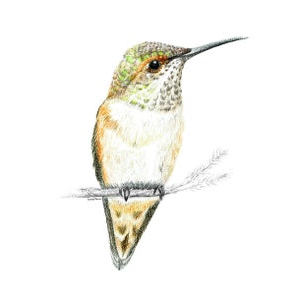



In [ ]:
import pandas as pd
import numpy as np 
import geopy as gp
import plotly.express as px
from google.colab import drive
drive.mount('/content/drive')
import json # this is a library to parse json (javascript object notation)
from urllib.request import urlopen # library to read data from a URL

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Extraction**

Ebird exported observations for Allen hummingbirds filtered for last 10 years within 8 counties in Southern California (Los Angeles, Orange, Ventura, Santa Barbara, Kern, San Bernardino, Riverside, San Diego)

In [ ]:
ebd = pd.DataFrame(pd.read_csv('/content/drive/My Drive/Colab Notebooks/data_birds.csv'))
ebd["observation_date"] = pd.to_datetime(ebd['observation_date'])
ebd["year"] = ebd["observation_date"].dt.year
ebd[['observation_date', 'observation_count','county','longitude','latitude','year']] 

,observation_date,observation_count,county,longitude,latitude,year
0,2013-09-29,1,Santa Barbara,-119.889801,34.423208,2013
1,2013-09-01,2,Orange,-117.838347,33.667204,2013
2,2013-06-28,1,Los Angeles,-118.071270,34.032176,2013
3,2013-07-10,1,Ventura,-119.196905,34.266753,2013
4,2013-09-08,2,Orange,-117.785883,33.653638,2013
...,...,...,...,...,...,...
350975,2023-01-16,6,San Diego,-117.150900,32.734890,2023
350976,2023-01-12,1,Orange,-118.001700,33.708840,2023
350977,2023-01-28,1,San Bernardino,-117.131300,34.027330,2023
350978,2023-01-07,1,Santa Barbara,-119.879200,34.419850,2023


**Data Visualization 1: Hummingbird observations from 2013 - 2022 in Los Angeles County**

In [ ]:
ebd_la = ebd.where(((ebd["county"]==("Los Angeles")) & (ebd["year"] !=2023)))
ebd_la = ebd_la[['observation_date','longitude','latitude','year']] 
ebd_la = ebd_la.dropna()
fig = px.scatter_geo(ebd_la,lat="latitude",lon="longitude",animation_frame='year')

fig.update_layout(geo=dict
                  (center=dict(
                      lon=-118.234216,
                      lat=34.08851
                      ),
                   scope='usa',
                   projection_scale=26
                   )
                  )
fig.show()

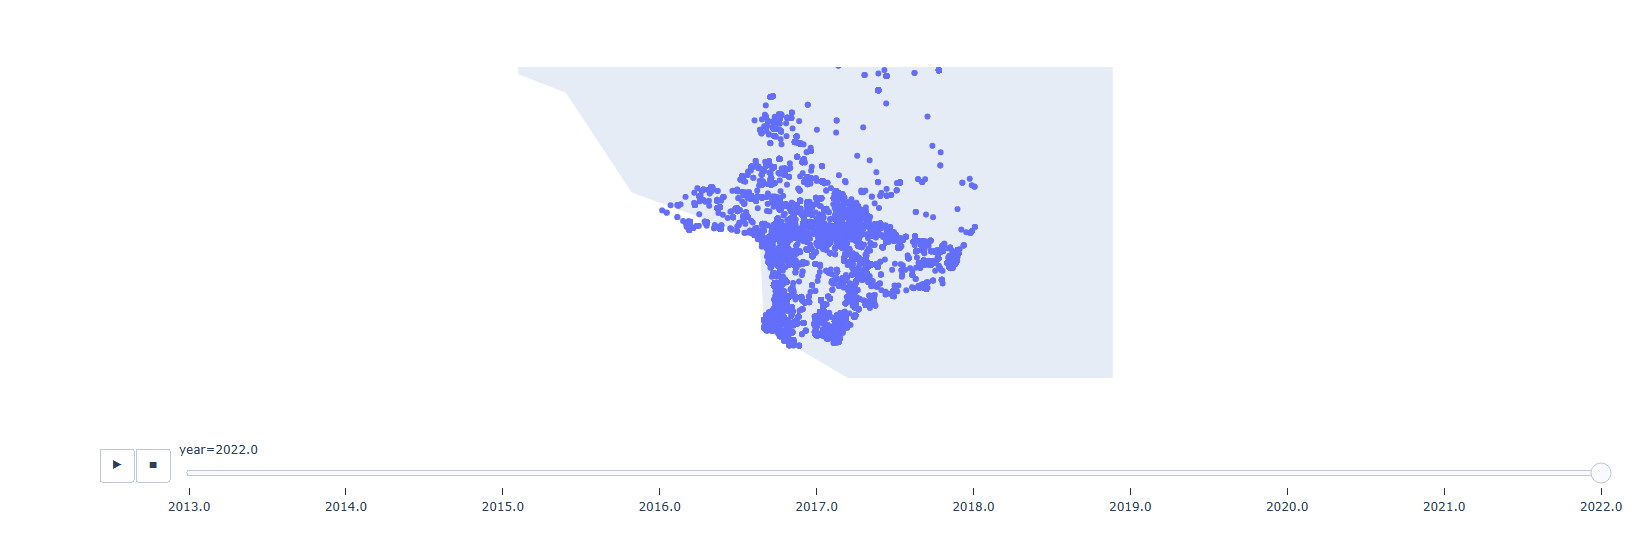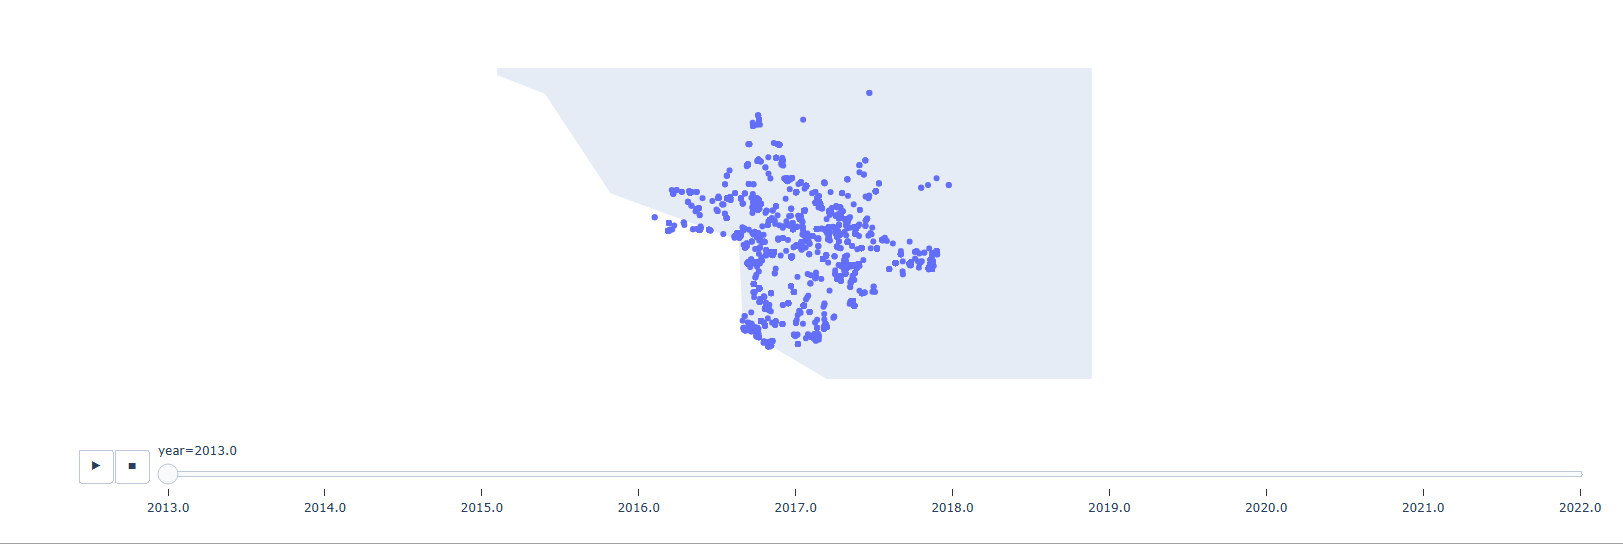

In [ ]:
ebd_totals= ebd.groupby(['year','county'])['observation_count'].sum()
ebd_all_totals = ebd.groupby(['year'])['observation_count'].sum()

ebd_density = pd.DataFrame(ebd_totals/ebd_all_totals)
ebd_density

observation_count
year county                           
2013 Los Angeles              0.591393
     Orange                   0.251726
     Riverside                0.009582
     San Bernardino           0.009135
     San Diego                0.042550
...                                ...
2023 Riverside                0.007683
     San Bernardino           0.009737
     San Diego                0.223204
     Santa Barbara            0.029785
     Ventura                  0.047410

[79 rows x 1 columns]


**Data Visualization 2: Change in Allen's Hummingbird Densities over Last 10 Years by County**

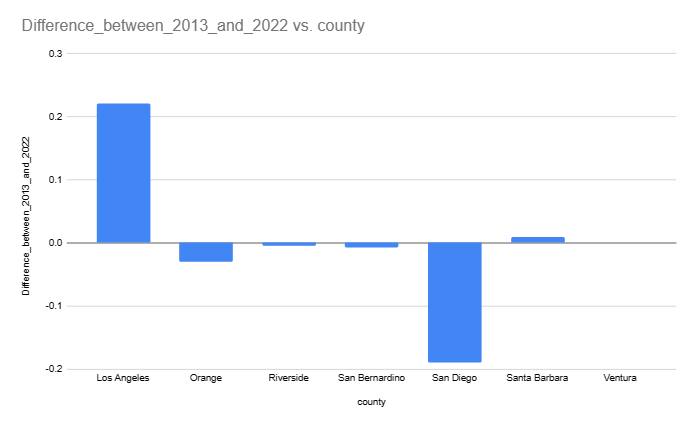



# Next Steps
Beause we are having trouble obtaining temperature and elevation data based on lat/long/date information, we are considering looking at changes in the birds' migratory pattern instead of changes in habitat suitability. Using lat/long/date information alone, we can attempt to see if they are spending for longer/shorter periods of time in certain regions, if they have started their migration sooner...etc
